# Se hace un análisis más detallado de la serie de Fourier del potencial de tipo barrera

In [89]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy.integrate import quad, trapz
%matplotlib inline

In [15]:
heaviside = lambda x: 0.5 if x == 0 else 0 if x < 0 else 1

def potencial_num(x, v0, rho):
    v = np.zeros_like(x)
    for i in range(len(x)):
        for n in range(-3,3):
            v[i]+= v0*heaviside((x[i]-(1-rho)/2)-(n+rho))*heaviside(n+1-(x[i]-(1-rho)/2))
    return v

def potencial(x, v0, rho):
    v = 0.0
    for n in range(-3,3):
        v += v0*heaviside((x-(1-rho)/2)-(n+rho))*heaviside(n+1-(x-(1-rho)/2))
    return v

(0, 1.1)

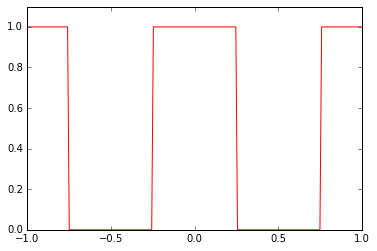

In [4]:
x = np.linspace(-1,1,200)
plot(x, potencial_num(x, 1, 0.5), 'r', label="$V(x)$")
ylim(0,1.1)

In [34]:
def potencial_func_base(x, n, v0, rho):
    return potencial(x,v0,rho)*0.5*np.exp(-2.0j*np.pi*n*x)

In [41]:
def Serie_Fourier(x, potencial_base, m, v0, rho):
    Serie = 0.0+0.0j
    disk = [0.5*(-1-rho), 0.5*(-1+rho),0.5*(1-rho), 0.5*(1+rho)]
    for n in range(-m,m+1):
        Serie += 2*0.5*np.exp(-2.0j*np.pi*n*x)*quad(potencial_base, -1.0, 1.0, args=(n, v0, rho), points=disk)[0]
    return Serie

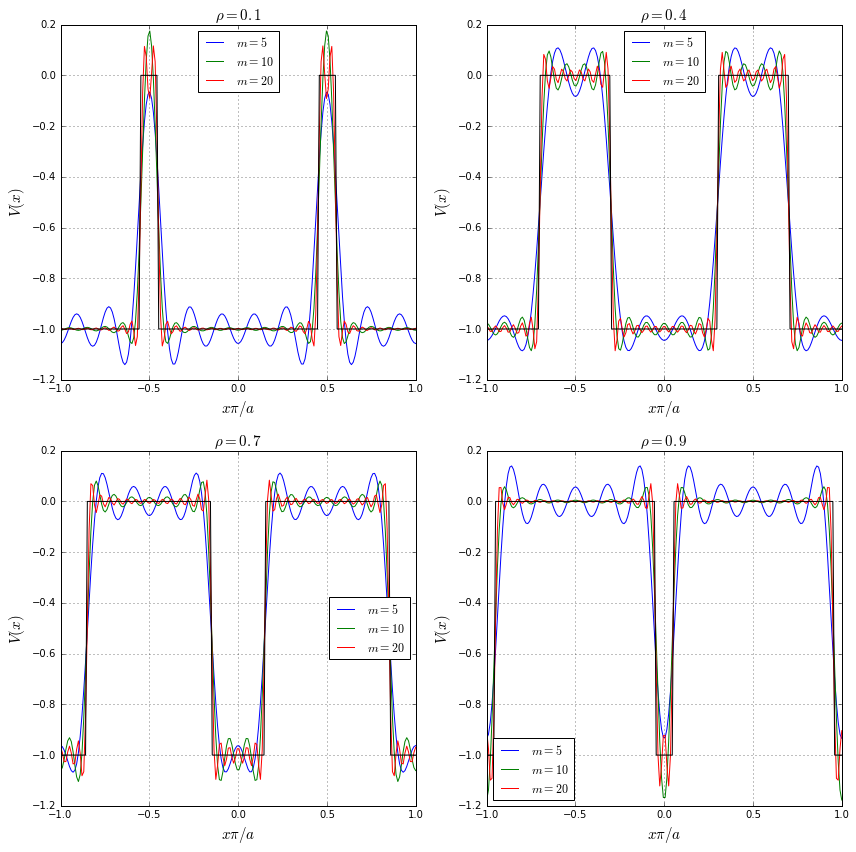

In [104]:
x = np.linspace(-1,1,200)
v0 = -1.
plt.figure(figsize=(14, 14))

gs = gridspec.GridSpec(2, 2) 
rho = [0.1, 0.4, 0.7, 0.9]
for i in range(4):
    plt.subplot(gs[i])
    for m in [5, 10, 20]:
        serie = Serie_Fourier(x, potencial_func_base, m, v0, rho[i])
        plt.plot(x, serie, label="$m = {}$".format(m))
    plt.plot(x, potencial_num(x, v0, rho[i]), 'black')
    plt.title("$\\rho = {}$".format(rho[i]), fontsize=15)
    plt.xlabel("$x\\pi/a$", fontsize=15)
    plt.ylabel("$V(x)$", fontsize=15)
    plt.grid(True)
    plt.legend(loc='best')

# Ahora las eigenenergias en función de la base

In [92]:
def Hamiltonian(N, K, v0, rho):
    h = np.zeros((2*N+1,2*N+1))
    for n in range(-N,N+1):
        for m in range(-N,N+1):
            if n==m:
                h[m,n] = (2*n+K)*(2*n+K) + v0*(1-rho)
            else:
                if (m-n+1)%2==0:
                    h[m,n] = v0*np.sin(np.pi*(m-n)*rho)/(np.pi*(m-n))
                else:
                    h[m,n] = -v0*np.sin(np.pi*(m-n)*rho)/(np.pi*(m-n))
    return h

def ParseKa(Ka_vals, N, v0, rho):
    Ka = np.linspace(-1, 1, Ka_vals)
    Eigenvals = np.zeros((Ka_vals, 2*N+1))
    for i in xrange(Ka_vals):
        H = Hamiltonian(N, Ka[i], v0, rho)
        Eigenvals[i] = LA.eigvalsh(H)
        
    Energies = np.zeros((2,(2*N+1)*Ka_vals))
    for j in xrange(2*N+1):
        for i in xrange(Ka_vals):
            Energies[:,i*(2*N+1)+j] = [Ka[i],Eigenvals[i,j]]
    return Energies

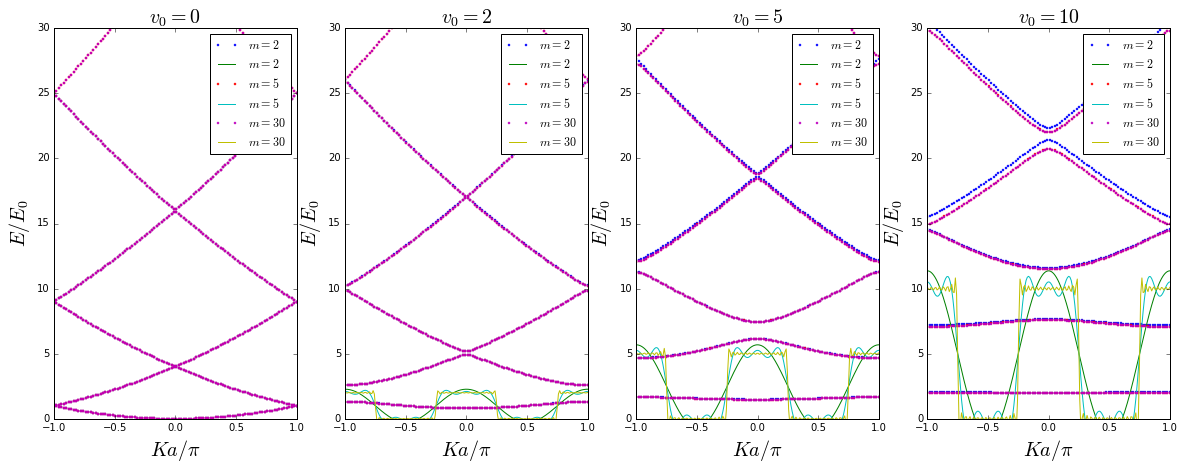

In [112]:
Ka_vals = 100
rho = 0.5
v0s = [0, 2, 5, 10]
x = np.linspace(-1,1,200)

figure(figsize=(20,7))
gs = gridspec.GridSpec(1, 4) 
for i in range(4):
    plt.subplot(gs[i])
    for m in [2, 5, 30]:
        Energies = ParseKa(Ka_vals, m, v0s[i], rho)
        plt.plot(Energies[0,:], Energies[1,:], '.', markersize=4, label="$m = {}$".format(m))
        serie = Serie_Fourier(x, potencial_func_base, m, v0s[i], rho)
        plt.plot(x, serie, label="$m = {}$".format(m))
        plt.title("$v_0 = "+str(v0s[i])+"$", fontsize=20)
        plt.ylim(0, 30)
        plt.xlabel("$Ka/\pi$", fontsize=20)
        plt.ylabel("$E/E_0$", fontsize=20)
        plt.legend()

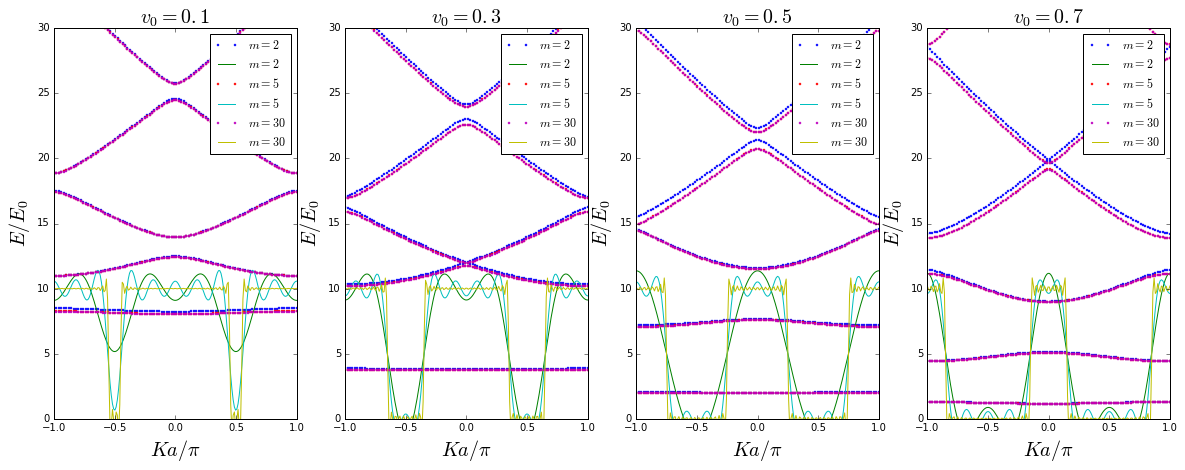

In [116]:
Ka_vals = 100

v0 = 10
rhos = [0.1, 0.3, 0.5, 0.7]

x = np.linspace(-1,1,200)

figure(figsize=(20,7))
gs = gridspec.GridSpec(1, 4) 
for i in range(4):
    plt.subplot(gs[i])
    for m in [2, 5, 30]:
        Energies = ParseKa(Ka_vals, m, v0, rhos[i])
        plt.plot(Energies[0,:], Energies[1,:], '.', markersize=4, label="$m = {}$".format(m))
        serie = Serie_Fourier(x, potencial_func_base, m, v0, rhos[i])
        plt.plot(x, serie, label="$m = {}$".format(m))
        plt.title("$v_0 = "+str(rhos[i])+"$", fontsize=20)
        plt.ylim(0, 30)
        plt.xlabel("$Ka/\pi$", fontsize=20)
        plt.ylabel("$E/E_0$", fontsize=20)
        plt.legend()